<a href="https://colab.research.google.com/github/nswapnil31/Investigating-Netflix-Movies-and-Guest-Stars-in-The-Office/blob/main/The_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
</ul>
    </div>

In [32]:
# Use this cell to begin your analysis, and add as many as you would like!
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[12,8]
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
df=pd.read_csv("/content/sample_data/office_episodes.csv")
df.head()

,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,3/24/2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,3/29/2005,NaN,Ken Kwapis,B. J. Novak,False
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,4/5/2005,NaN,Ken Whittingham,Paul Lieberstein,False
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,4/12/2005,NaN,Bryan Gordon,Michael Schur,False
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,4/19/2005,NaN,Greg Daniels,Greg Daniels,False


In [5]:
df.shape

(188, 12)

In [6]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          188 non-null    int64  
 1   episode_title   188 non-null    object 
 2   description     188 non-null    object 
 3   ratings         188 non-null    float64
 4   votes           188 non-null    int64  
 5   viewership_mil  188 non-null    float64
 6   duration        188 non-null    int64  
 7   release_date    188 non-null    object 
 8   guest_stars     29 non-null     object 
 9   director        188 non-null    object 
 10  writers         188 non-null    object 
 11  has_guests      188 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 16.5+ KB


In [7]:
df.describe()

,season,ratings,votes,viewership_mil,duration
count,188.000000,188.000000,188.000000,188.000000,188.000000
mean,5.468085,8.237234,2838.228723,7.246330,27.053191
std,2.386245,0.589930,1063.165290,2.066012,6.937254
min,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,7.250000,8.600000,3144.250000,8.425000,30.000000
max,9.000000,9.800000,10515.000000,22.910000,60.000000


**Interpreting Data**

After inspecting the data, we find that there are total of 11 columns and 188 rows. We find that each row represent an episode of the series in ascending order based on the Date column.

In addition, all columns do not have empty value except for GuestStars column, which can be interpreted as having no guest stars on that episode.

The data looks clean and ready to be explored.

### **Exploratory Data Analysis (EDA)**

EDA or Exploratory Data Analysis is an important part in data science as it can give us the insight of the data visually by plotting the graph.

### **Create Episode Numbers**

Before performing EDA, we need to first create an episode number so that it can be easily referenced without confusion.

In [8]:
# Create ep_no variable as a list for our next line of code to append the values in it
ep_no = []

# Create a loop to add episode number to ep_no variable
for lab, row in df.iterrows() :
    ep_no.append(lab+1)

# Adding the ep_no list to the dataset
df['episode_number'] = ep_no

df.head()

,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,episode_number
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,3/24/2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,1
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,3/29/2005,NaN,Ken Kwapis,B. J. Novak,False,2
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,4/5/2005,NaN,Ken Whittingham,Paul Lieberstein,False,3
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,4/12/2005,NaN,Bryan Gordon,Michael Schur,False,4
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,4/19/2005,NaN,Greg Daniels,Greg Daniels,False,5


### Normalizing Ratings

We now have the eipsode number and next thing we wanted to do is normalizing the ratings of The Office series so that we know which episode has the worst rating (0 point) and and which episode has the highest rating (1 point). Morover, it can be useful when we visualize the graph as it gives better view of ratings in The Office series.

To do so, we need to first find the maximum and minimum rating of the series

In [9]:
# Create Scaled Ratings
max_rating = max(df['ratings'])
min_rating = min(df['ratings'])

# Create a series of normalized ratings between 0 and 1
scaled_ratings = (df['ratings'] - min_rating) / (max_rating - min_rating)

# Add the newly created serie to the column named norm_ratings
df['scaled_ratings'] = scaled_ratings

df.head()

,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,episode_number,scaled_ratings
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,3/24/2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,1,0.28125
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,3/29/2005,NaN,Ken Kwapis,B. J. Novak,False,2,0.53125
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,4/5/2005,NaN,Ken Whittingham,Paul Lieberstein,False,3,0.37500
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,4/12/2005,NaN,Bryan Gordon,Michael Schur,False,4,0.46875
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,4/19/2005,NaN,Greg Daniels,Greg Daniels,False,5,0.56250


In [10]:
averageDurationRating = df.groupby(['season'])[['duration','ratings','viewership_mil','votes']].mean().reset_index()
averageDurationRating

,season,duration,ratings,viewership_mil,votes
0,1,22.833333,7.966667,6.366667,4304.000000
1,2,22.636364,8.440909,8.168182,3493.909091
2,3,25.782609,8.586957,8.494348,3224.086957
3,4,32.500000,8.564286,8.547857,3195.642857
4,5,28.884615,8.488462,8.756538,2885.615385
5,6,29.038462,8.196154,7.766154,2505.307692
6,7,31.083333,8.308333,7.305833,2748.083333
7,8,23.000000,7.604167,5.385417,2039.250000
8,9,26.043478,7.913043,4.138696,2475.826087


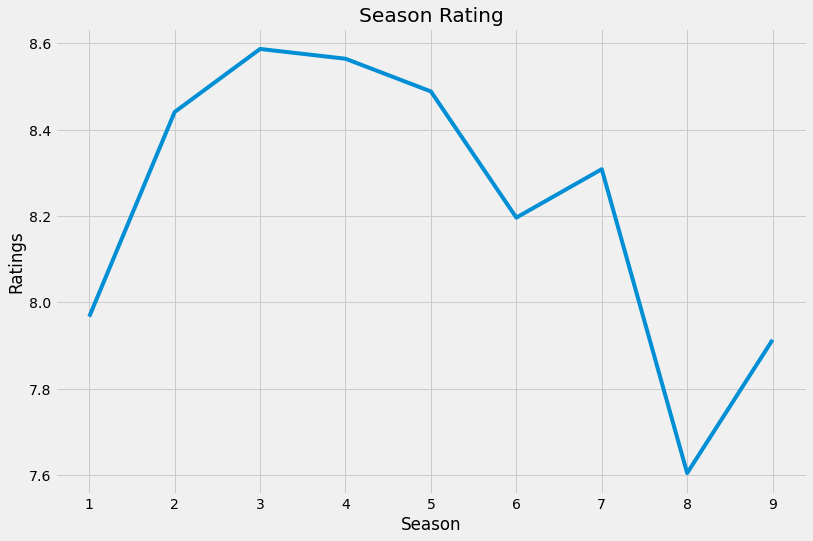

In [28]:

# plotting a scatter plot of Season vs Ratings and adding a trendline
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.plot(averageDurationRating['season'], averageDurationRating['ratings'])
plt.title("Season Rating")
plt.xlabel("Season")
plt.ylabel("Ratings")
# Show the plot
plt.show()

### **Some Observations and Personal Notes**

Season 1 of the show has a rating of around 8, this can be attributed by the fact that the show is particular unique in the way it portrays humour which can be quite cringy for first time viewers. 
season 1 only had 6 episodes, thus serves as a way for the writers to just see how the audience react and based on those responses, they could adapt and modify characters in the subsequent seasons. Also, season 1 could also be served as the gateway to all the seasons, new viewers would try The Office based on some recommendation and then might end up finding things not what they expected, while not realizing the other seasons are much much more enjoyable.
The show was at its peak rating at Season 3 and after that there is a steady decline up until Season 5, Season 6 was a sharp dip, which was recovered in Season 7. As an Office fan, I tend to ignore the existence of Season 8. Season 9 was pretty good for most parts.
The Average Duration of episodes has also changed across seasons. Season 3 which has the highest Rating has an average episode duration of 25 mins, while Season 4 has the highest average episode duration of 32.5 mins.

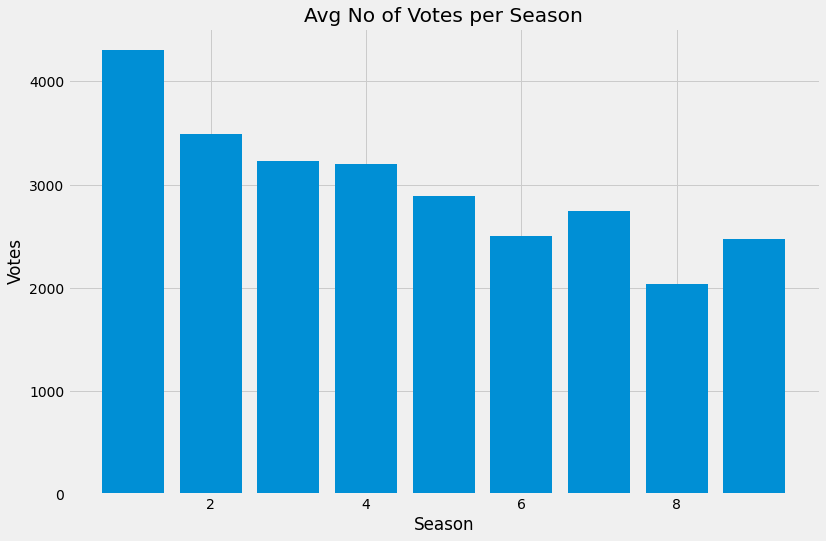

In [12]:

# plotting a scatter plot of Season vs Ratings and adding a trendline
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.bar(averageDurationRating['season'], averageDurationRating['votes'])
plt.title("Avg No of Votes per Season")
plt.xlabel("Season")
plt.ylabel("Votes")
# Show the plot
plt.show()

The average number of votes per episode has a somewhat consistent downward trend.

The average Viewership on the other hand has a general upward trend till season 5 after whih we see it declining.

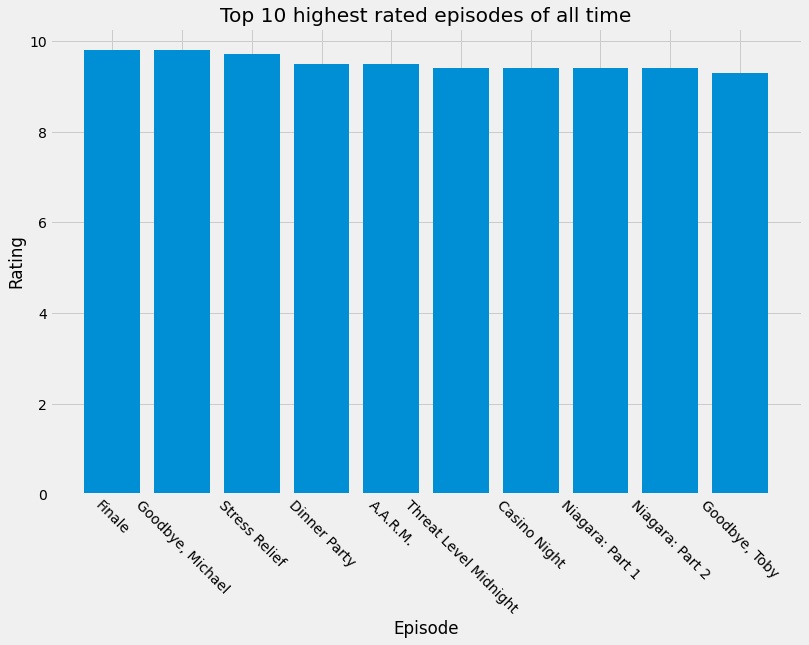

In [13]:

top_10_rated = (df.sort_values(by=['ratings','votes'],ascending=False))[0:10]

# plotting a scatter plot of Season vs Ratings and adding a trendline
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.bar(top_10_rated['episode_title'], top_10_rated['ratings'])
plt.title("Top 10 highest rated episodes of all time")
plt.xlabel("Episode")
plt.xticks(rotation=-45)
plt.ylabel("Rating")
# Show the plot
plt.show()

For highest rated episode, there seems to be a tie between two episodes - Goodbye, Michael and Finale both being rated 9.8.

Fun fact is that Steve Carell's contract ended and he left the show in Goodbye, Michael and returned for the Finale episode.

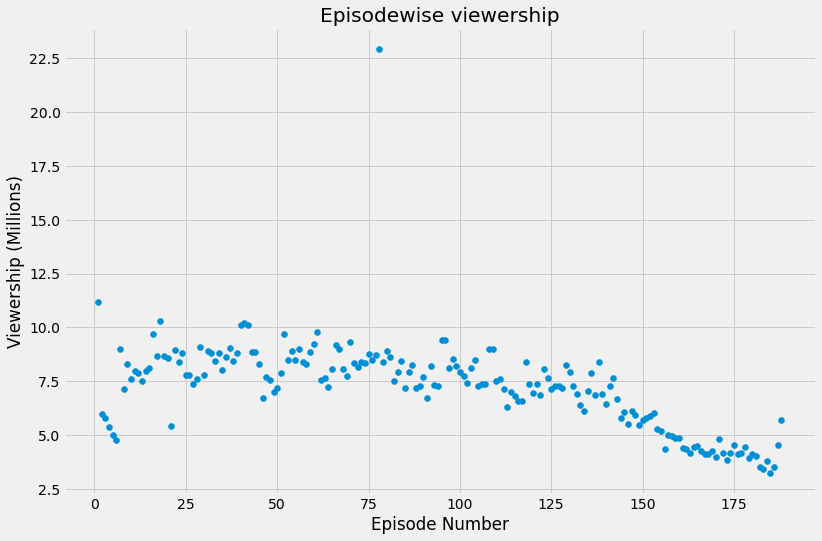

In [14]:
# Create a figure and increase the figure size
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.scatter(df['episode_number'],df['viewership_mil'])
plt.title("Episodewise viewership")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
# Show the plot
plt.show()

### **Adding Color for each Ratings**

In order to make the graph visually appealing and easy-to-understand, we can assign colors to the ratings.

Episode with ratings less than 0.25 will be presented in red color

Episode with ratings from 0.25 to 0.49 will be presented in orange color

Episode with ratings from 0.50 - 0.74 will be presented in yellow color

Episode with ratings from 0.75 - 1.00 will be presented in green color

In [15]:
colors=[]

for lab, row in df.iterrows():
    if row['scaled_ratings'] <0.25:
        colors.append('red')
    elif row['scaled_ratings'] >=0.25 and row['scaled_ratings'] <0.50 :
        colors.append('orange')
    elif row['scaled_ratings'] >=0.5 and row['scaled_ratings'] <0.75 :
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

print(colors[0:10])
        

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen']


# function to map rating to color
def rat2col(rating):
    if rating < 0.25:
        return("red")
    elif 0.25 <= rating < 0.50:
        return("orange")
    elif 0.50 <= rating < 0.75:
        return("lightgreen")
    else:
        return("darkgreen")
    
# Iterate over scaled_ratings row of Office_data to input color name to the colors list
colors = Office_data['norm_ratings'].apply(rat2col)

# Inspect colors  
colors

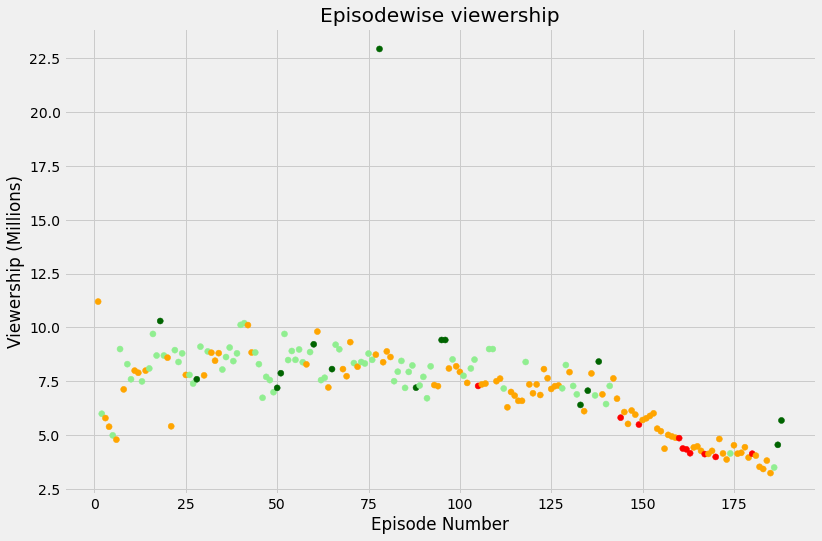

In [16]:
# Create a figure and increase the figure size
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.scatter(df['episode_number'],df['viewership_mil'], color=colors)
plt.title("Episodewise viewership")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
# Show the plot
plt.show()

### **Exploring and Interpreting First Graph**

We've created our first graph and let's interpret what's shown in it.

1. We see that the viewerships were very fluctuate and contain a big gap between highest and lowest viewerships during the first couple episodes of The Office series. It can be interpret that the series is just being introduced to the audiences and that first episode usually draw many people to watch, resulting more than 10 millions viewerships. A couple episodes later, it dropped down drastically before picking up again and become stable in between 7.5 and 10 millions viewerships.
2. During the first and second quartile, The viewerships were stable and the majority of the ratings were yellow and some green mix with orange.
3. The third quartile and forth quartile, however, orange ratings become more common and last quartile were filled with many low ratings in red.
4. We see that green ratings are distributed evenly among the graph and usually attract a little more viewerships when compared to couple episodes before or after.
5. There's one single episode that has a very distinctive high viewership with more than 22 millions people watching.

### **Investigating Further**

We now see that there is an episode of The Office with super high viewerships and we now need to investigate further.

Some questions to be answer are:

1. Did that episode feature guest star(s)?

2. If so, then who?

3. What number of episode was it?

### **Formulating Plan**

Our plan to find out more about the guest stars is simple. We can just change the shape and size of our plot to present the episodes with guest stars.

First, we need to separate the dataframe into 2. One with guest stars and another without. By doing so, we need to create a column containing boolean data: True for having guest stars and False for not having guest stars.

Then later, we can tweak the graph by changing the shape and size of episodes featuring guest stars.

In [17]:
marker=[]

for lab, row in df.iterrows():
    if row['has_guests']==True:
        marker.append(250)
    else:
        marker.append(25)

print(marker[0:10])

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]


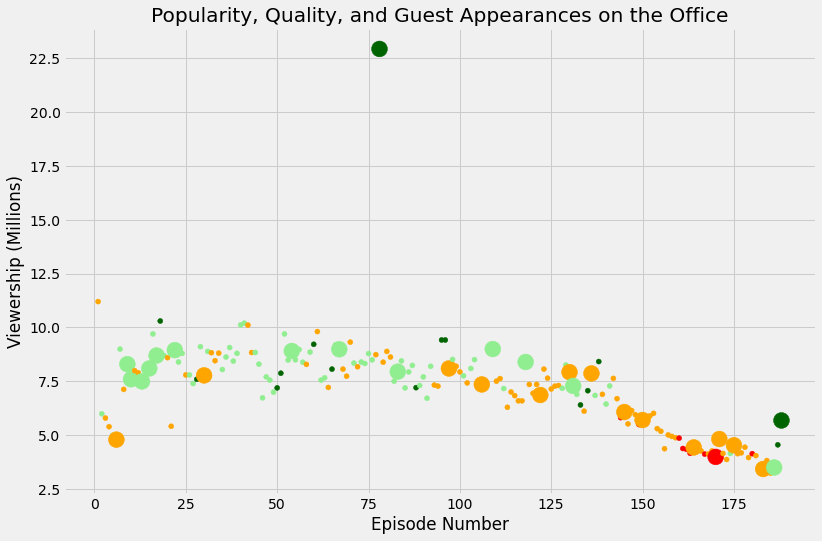

In [18]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.scatter(df['episode_number'],df['viewership_mil'],c=colors,s=marker)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
# Show the plot
plt.show()

In [19]:
df['colors']=colors
df['sizes']=marker
df.head()

,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,episode_number,scaled_ratings,colors,sizes
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,3/24/2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,1,0.28125,orange,25
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,3/29/2005,NaN,Ken Kwapis,B. J. Novak,False,2,0.53125,lightgreen,25
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,4/5/2005,NaN,Ken Whittingham,Paul Lieberstein,False,3,0.37500,orange,25
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,4/12/2005,NaN,Bryan Gordon,Michael Schur,False,4,0.46875,orange,25
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,4/19/2005,NaN,Greg Daniels,Greg Daniels,False,5,0.56250,lightgreen,25


In [20]:
non_guest_df=df[df['has_guests']==False]
guest_df=df[df['has_guests']==True]

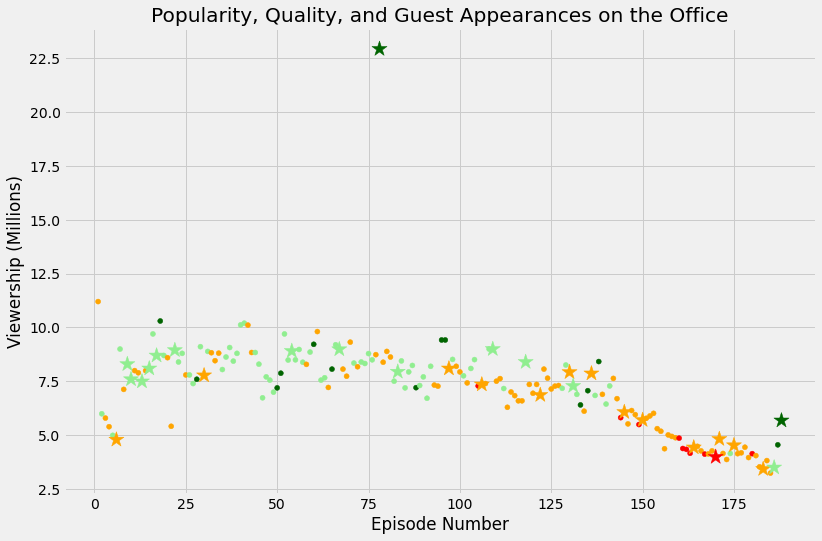

In [21]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.scatter(non_guest_df['episode_number'],
            non_guest_df['viewership_mil'],
            c=non_guest_df['colors'],
            s=non_guest_df['sizes'])

plt.scatter(guest_df['episode_number'],
            guest_df['viewership_mil'],
            c=guest_df['colors'],
            s=guest_df['sizes'],
           marker='*')
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
# Show the plot
plt.show()

### **Continue Investigation**

After plotting the second graph, we now can answer the first question that the highest viewerships episode did feature guest star(s).

And now we should find out more about that episode in order to answer our second and third questions: Who the guest stars are and which episode is it.

In [22]:
# Let's extract the episode with highest viewerships episode as hv_ep
hv_ep = guest_df[guest_df['viewership_mil'] == max(guest_df['viewership_mil'])]

print('Episode number ' + str(hv_ep['episode_number'].item()) + ' has the highest viewership with ' + str(hv_ep['viewership_mil'].item()) + ' millions people watching and it feature guest stars: ' + hv_ep['guest_stars'].item())

Episode number 78 has the highest viewership with 22.91 millions people watching and it feature guest stars: Cloris Leachman, Jack Black, Jessica Alba


In [23]:
df.groupby('director').size().sort_values(ascending=False).reset_index(name='Movie Count')[0:10]

,director,Movie Count
0,Randall Einhorn,15
1,Paul Feig,15
2,Greg Daniels,13
3,Ken Kwapis,13
4,Jeffrey Blitz,11
5,David Rogers,9
6,Charles McDougall,8
7,Ken Whittingham,8
8,Matt Sohn,8
9,Paul Lieberstein,7


In [24]:
df.groupby(['director'])[['ratings','scaled_ratings']].mean().sort_values(by = 'ratings',ascending = False).reset_index()[0:10]

,director,ratings,scaled_ratings
0,Harold Ramis,8.825000,0.695312
1,Jason Reitman,8.800000,0.687500
2,Steve Carell,8.766667,0.677083
3,Paul Feig,8.753333,0.672917
4,Joss Whedon,8.700000,0.656250
5,Gene Stupnitsky,8.700000,0.656250
6,Tucker Gates,8.650000,0.640625
7,Ken Kwapis,8.607692,0.627404
8,Julian Farino,8.600000,0.625000
9,Lee Eisenberg,8.600000,0.625000


Paul Feig and Randall Einhorn have directed the most number of episodes. Paul was the director of some of the most memorable episodes.

Paul Feig had directed Goodbye Michael, Dinner Party (an episode that is both amazing yet difficult to watch) and Niagara : Part 1 & 2. Randall has also directed some great episodes like Golden Ticket and Product Recall.

Harold Ramis has the highest Average Rating per directed episode at 8.825.Although Harold has only directed 4 episodes, he has directed episodes like Safety Training.

He is followed by Jason Reitman and our very own Steve Carell. It should however be noted the Jason Reitman has only directed one episode - Local Ad

### **Viewership in Millions per Season**

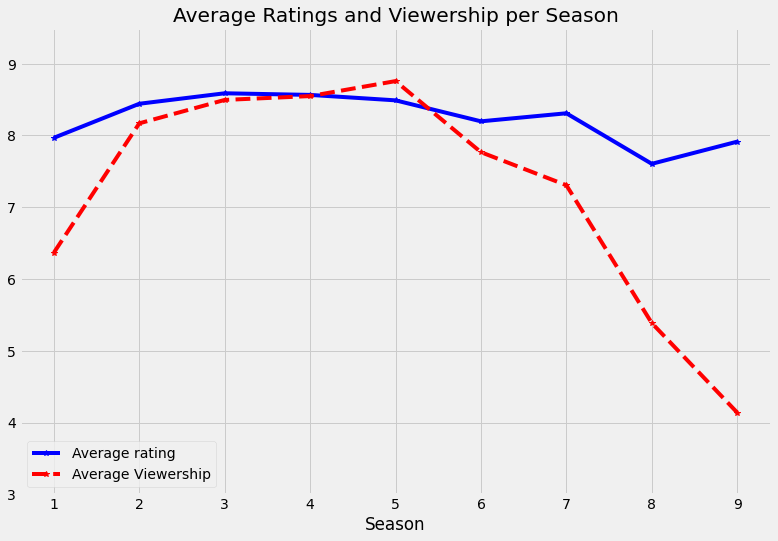

In [30]:
r_v = df.groupby('season')[['ratings','viewership_mil']].mean() 
plt.plot(r_v.index, r_v.ratings,'b*-', label='Average rating') 
plt.plot(r_v.index, r_v.viewership_mil,'r*--', label='Average Viewership') 
plt.legend(loc=3) 
plt.xlabel('Season') 
plt.title('Average Ratings and Viewership per Season') 
plt.ylim(3,9.5);

I used the mean value as the numbers of episodes are different in each season. The average ratings are almost the same across the seasons but average viewers decrease from season 7 to end and season 9 has the least viewers among all seasons.

### **Does viewership increase if guest stars are present?**

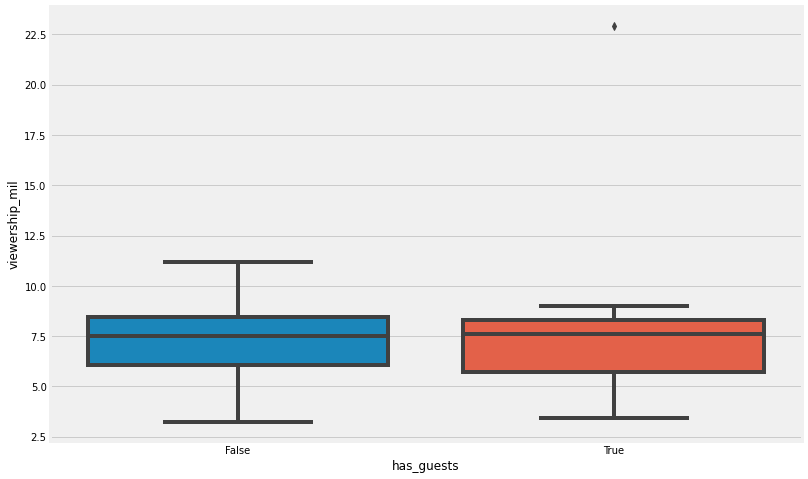

In [34]:
sns.boxplot(y = 'viewership_mil', x = 'has_guests', data = df);

As we know there is an outlier in the `viewership` column that has guest stars. Even an outlier contains, the mean values are almost the same and viewership does not seem to increase if guest stars are present.

In [25]:
def countNumberofGuestStars(guestStars):
    if(guestStars == ''):
        return 0
    else:
        stars = guestStars.split(',')
        return len(stars)

In [26]:
df['guest_stars'] = df['guest_stars'].fillna('')
df['Number_of_Guests'] = df['guest_stars'].apply(lambda x: countNumberofGuestStars(str(x)))

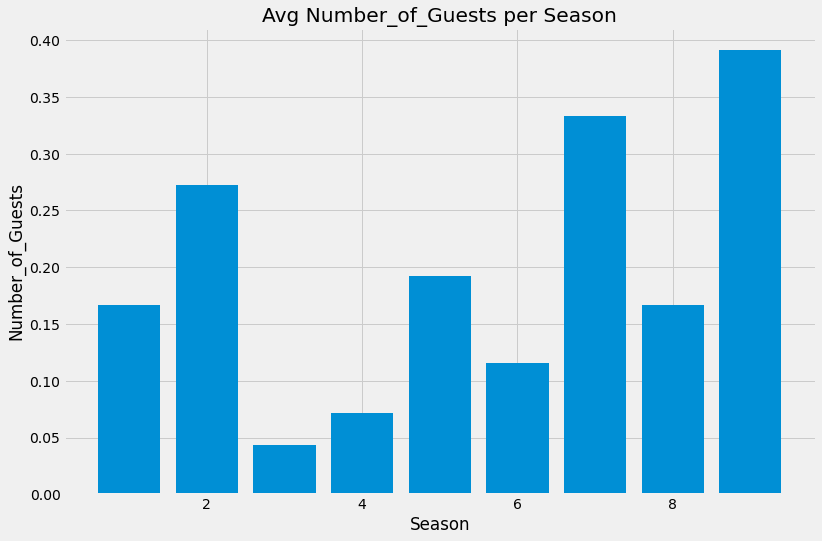

In [27]:
numOfGuests = df.groupby('season')['Number_of_Guests'].mean().reset_index()
# plotting a scatter plot of Season vs Ratings and adding a trendline
plt.style.use('fivethirtyeight')
fig = plt.figure()
plt.bar(numOfGuests['season'], numOfGuests['Number_of_Guests'])
plt.title("Avg Number_of_Guests per Season")
plt.xlabel("Season")
plt.ylabel("Number_of_Guests")
# Show the plot
plt.show()

We see a high average number of Guests per Episode in the 7th Season.

Possible Explanation - After seeing their then all time low rating in Season 6, the creators may have thought to add more episodes of Guests in order to help gain some popularity back. If this was the reason, they were more or less successful as S7 had a better rating than S6.

The Season 7 Episodes with Guests in them are :

The Search - 4 Guest Stars

Nepotism - 1 Guest Star

The Sting - 1 Guest Star

Training Day - 1 Guest Star

The Seminar - The Guest Star! Ricky Gervais

### **Conclusion**

In this notebook, we have demonstrated some basic python coding with 2 modules: pandas and mayplotlib.

We started from loading and inspecting data in CSV file and noticed that the dataset contains 188 episodes of the series. Dataset itself is clean and sorted in release date order.

We've put in some effort of transforming data by creating new columns that contain essential datas in order to perform Exploratory Data Analysis (EDA).

After plotting our first graph for EDA, we learn that first half of the entire series were stable in term of ratings and viewerships. However, the popularity and quality of the show began to drop. It became clear near the end of the show that its rating and viewership were uncomparable to when it started.

We also found that there is one particular episode where the show draws almost 23 millions viewerships when compared to other episodes with just between 5 and 10 millions viewerships.

With further investigation, we found that it is episode number 78 that has the highest viewership and it features 3 guest stars including Cloris Leachman, Jack Black, and Jessica Alba.